Diabetes Dataset Preprocessing.

In [5]:
import pandas as pd

# Replace 'path_to_your_csv_file' with the actual path to your CSV file
csv_file_path = "C:\\Users\\aamis\\Downloads\\myfirstproject\\diabetes_prediction_dataset.csv"

# Create a dataframe from the CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe to verify it was loaded correctly
print(df.head())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


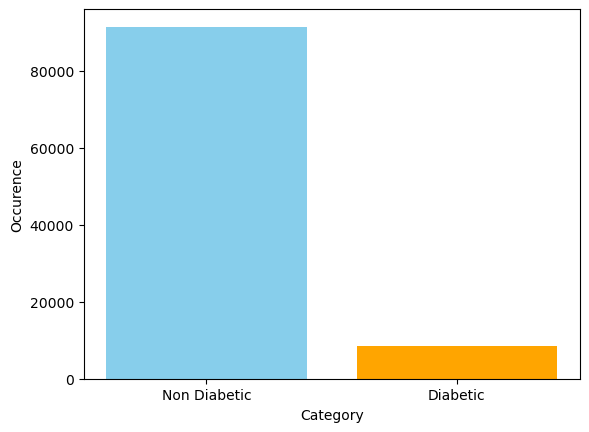

In [6]:
# bar chart for dataset containing Non-Diabetic and Diabetic Patient.
import matplotlib.pyplot as plt
Class = df["diabetes"].values
nd = 0
d = 0
for x in Class:
    if x == 1:
        d += 1
    else:
        nd += 1

container = ["Non Diabetic","Diabetic"]
values = [nd,d]
# plotting bar chart.
plt.bar(container,values,color=['skyblue','orange'])
plt.xlabel("Category")
plt.ylabel("Occurence")
plt.show()

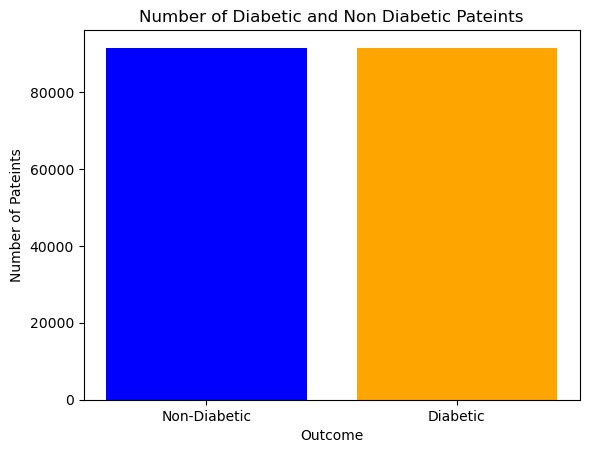

In [7]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
# Load your dataset
# Assuming your dataset is stored in a CSV file called 'your_dataset.csv'
df = pd.read_csv("C:\\Users\\aamis\\Downloads\\Project Exhibition 2 Datasets\\archive\\diabetes_prediction_dataset.csv")

# Convert categorical variables to numeric
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

# Separate features and target variable
X1 = df.drop(columns=['diabetes'])
y1 = df['diabetes']

# Apply RandomOverSampler to balance the dataset
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X1, y1)

# Convert the resampled data back to a DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X1.columns)
balanced_df['diabetes'] = y_resampled

# Printing the balanced dataset
outcome_counts = balanced_df['diabetes'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'orange'])
plt.xticks(outcome_counts.index, ['Non-Diabetic', 'Diabetic'])
plt.xlabel('Outcome')
plt.ylabel('Number of Pateints')
plt.title('Number of Diabetic and Non Diabetic Pateints')
plt.show()

In [10]:
print(balanced_df.columns)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current', 'diabetes'],
      dtype='object')


In [8]:
# percentage of Diabetic Patient in dataset.
p = round(d/(d+nd),4)
p = p*100
print("Percentage of Diabetic Patients in Dataset : ",p,"%")

Percentage of Diabetic Patients in Dataset :  8.5 %


In [11]:
# separating target column (i.e., diabetic or non diabetic)
y = balanced_df['diabetes']
X = balanced_df.drop('diabetes', axis=1)

In [12]:
# first we need to split the dataset into train and test.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for many ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Conv2D, AveragePooling2D, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Reshape the data into a format suitable for DenseNet
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Hyperparameters
growth_rate = 32
num_layers_per_block = 6
num_blocks = 3
num_classes = 1  # Binary classification

# Dense block
def dense_block(x, num_layers):
    for _ in range(num_layers):
        bn = BatchNormalization()(x)
        relu = Activation('relu')(bn)
        conv = Conv2D(growth_rate, 3, padding='same')(relu)
        x = Concatenate()([x, conv])
    return x

# Transition block
def transition_block(x):
    bn = BatchNormalization()(x)
    relu = Activation('relu')(bn)
    conv = Conv2D(growth_rate, 1, padding='same')(relu)
    avg_pool = AveragePooling2D(2, padding='same')(conv)
    return avg_pool

# Build DenseNet model
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)
inputs = Input(shape=input_shape)
x = Conv2D(growth_rate, 3, padding='same')(inputs)

for i in range(num_blocks):
    x = dense_block(x, num_layers_per_block)
    if i < num_blocks - 1:
        x = transition_block(x)

x = Flatten()(x)
outputs = Dense(num_classes, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f'Test accuracy: {test_acc}')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 15, 1, 1)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 15, 1, 32)         │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 15, 1, 32)         │             128 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 15, 1, 32)         │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 15, 1, 32)         │           9,248 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 15, 1, 64)         │               0 │ conv2d[0][0],              │
│                               │                           │                 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 15, 1, 64)         │             256 │ concatenate[0][0]          │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 15, 1, 64)         │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 15, 1, 32)         │          18,464 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 15, 1, 96)         │               0 │ concatenate[0][0],         │
│                               │                           │                 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 15, 1, 96)         │             384 │ concatenate_1[0][0]        │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 15, 1, 96)         │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 15, 1, 32)         │          27,680 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 15, 1, 128)        │               0 │ concatenate_1[0][0],       │
│                               │                           │                 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 606,657 (2.31 MB)

 Trainable params: 601,729 (2.30 MB)

 Non-trainable params: 4,928 (19.25 KB)

Epoch 1/10
3660/3660 ━━━━━━━━━━━━━━━━━━━━ 112s 26ms/step - accuracy: 0.8922 - loss: 0.2283 - val_accuracy: 0.9072 - val_loss: 0.1886
Epoch 2/10
3660/3660 ━━━━━━━━━━━━━━━━━━━━ 93s 25ms/step - accuracy: 0.9042 - loss: 0.1942 - val_accuracy: 0.9084 - val_loss: 0.1852
Epoch 3/10
3660/3660 ━━━━━━━━━━━━━━━━━━━━ 91s 25ms/step - accuracy: 0.9061 - loss: 0.1909 - val_accuracy: 0.9099 - val_loss: 0.1829
Epoch 4/10
3660/3660 ━━━━━━━━━━━━━━━━━━━━ 94s 26ms/step - accuracy: 0.9069 - loss: 0.1851 - val_accuracy: 0.9098 - val_loss: 0.1815
Epoch 5/10
3660/3660 ━━━━━━━━━━━━━━━━━━━━ 93s 25ms/step - accuracy: 0.9072 - loss: 0.1859 - val_accuracy: 0.9075 - val_loss: 0.1895
Epoch 6/10
3660/3660 ━━━━━━━━━━━━━━━━━━━━ 91s 25ms/step - accuracy: 0.9059 - loss: 0.1872 - val_accuracy: 0.9099 - val_loss: 0.1809
Epoch 7/10
3660/3660 ━━━━━━━━━━━━━━━━━━━━ 92s 25ms/step - accuracy: 0.9094 - loss: 0.1795 - val_accuracy: 0.9108 - val_loss: 0.1790
Epoch 8/10
3660/3660 ━━━━━━━━━━━━━━━━━━━━ 95s 26ms/step - accuracy: 0.9087 

In [ ]:
# since the dataset is imbalanced, we will use SMOTE (Synthetic Minority Oversampling Technique).
